#### AI
    - 머신러닝, 컴퓨터 비전(사진이나 영상처리), 자연어 처리(음성번역), 로봇 공학 등 그와 관련된 무든 주제를 포괄하는 개념 
#### Machine Learning
    - 더 많은 데이터 축적(GIGO)을 통해 성능을 개선할 수 있도록 하는 다양한 알고리즘과 방법론  
    - 반드시 좋은데이터를 넣어 줘야한다.
#### Deep Learning
    - 신경망(Neural Network)을 부르는 다른 이름
    - 여러 개의 히든 레이어를 통해 깊게 학습한다고 해서 붙여진 이름 


---
#### Machine Learning 과 Data Mining
    - 머신러닝은 훈련 데이터를 통해서 학습된 알려진 속성을 기반으로 한 에측에 중점
    - 데이터 마이닝은 데이터의 미처 몰랐던 속성을 발견하는 것에 집중( 이는 데이터베이서의 지식 발견 부분의 분석절차에 해당한다.)
    - 이들은 방법적으로 중복되는 부분이 있다. 데이터마이닝에서는 머신러닝은 필수가 아니지만 머신러닝에서는 데이터마이닝이 필수라는 부분이 다르다.
    

---
## 머신러닝의 종류 

#### 1. 지도학습(교사학습)
    - 답을 알려주고 학습을 시키는 것
    - 회귀(Regression)
        + 연속적인 숫자를 분석할 때 
        + 선형회귀 
        
    - 분류(Classification)
        + 로지스틱 선형 회귀
        + KNN
        + Decision Tree
        + Random Forest
        + SVM
        + Naive Bayes(조건부확률)
        + Neural Network
#### 2. 비지도학습(비교사학습)
    - 답을 알려주지 않고 찾게 하는 것 
    - 군집(Clustering)
        + K-MEANS
        + DBSCAN
    - 차원 축소
        + PCA

#### 3. 강화학습 (Reinforcement Learning)
    - 어느정도의 답만 알려주고 나머지의 답은 스스로 찾게 해주는 것
    - 지도학습과 비지도학습을 섞어놓은 형태
    - 완전한 답을 제공하지 않는다.
    - 보상시스템 (잘했을 때에는 상을 주고 잘못했을 때는 벌을 줘서 답을 찾게 하는 것) 
    


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

#폰트 지정
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

In [2]:
#SKlearn 머신러닝 전용 패키지 
# !pip install mglearn
import mglearn #단순히 학습용 패키지

### 샘플 소개

C:\Users\Master\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, '두번째 특성')

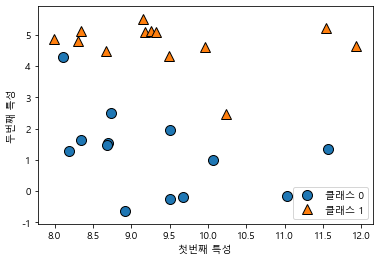

In [15]:
# 이진 분류 데이터셋(둘 중에 하나를 고르는 것)
X, y = mglearn.datasets.make_forge() 
# 관례적으로 X 는 입력 데이터(훈련, 학습데이터) , y는 데이터에 대한 설명(정답)
X
#머신런닝의 학습데이터의 형식은 2차원 배열로 전달된다.
y
#y 는 레이블 데이터라고도 한다.  y는 1차월 배열이여야 한다.

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

(-3.0, 3.0)

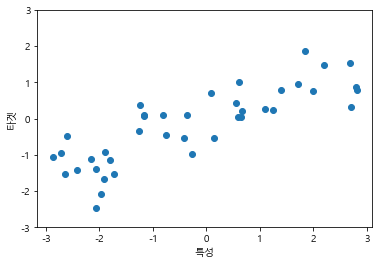

In [20]:
# 회귀 분석용 샘플
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.xlabel("특성")
plt.ylabel("타겟")
plt.ylim(-3, 3)

In [3]:
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()
print(cancer.keys())
cancer.data  # X
cancer.target # y
#print(cancer.DESCR)
type(cancer)
cancer.data.shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


(569, 30)

In [13]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.data.shape

boston.feature_names



array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

---
#### 과대적합
    - 너무 하나의 데이터에만 훈련이 잘 되어있어 다른 데이터가 들어오면 꽝이 되버리는 것
    - 일반성이 떨어진다고 이야기한다. 
    - 훈련 데이터셋의 각 샘풀에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만드는 것
#### 과소적합
    - 너무 간단한 모델이 선택되는 것
#### 일반화
    - 어떤 데이터가 들어오든 결과가 동일하게 나와야 한다.
    - 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것
   
#### 과대적합을 해결하는 3가지 방법
    - 특성수를 줄인다
    - 훈련데이터를 더 많이 모은다
    - 잡음을 줄인다.

#### 과소적합을 해결하는 ㅂ압법
    - 더많은 강력한 모델 
    - 전처리 
    - 모델의 제약을 줄인다.

---
## KNN(K - Nearest neighbors)

#### 1) 특징 
    - 이해하기 쉽고 직관적인 모델
    - 더 복잡한 알고맂므을 작용하기 전에 시도해 볼 수 있는 알고리즘
    - 훈련데이터셋이 너무 크면 예측이 느려진다는 단점이 있다.(너무 큰 데이터에는 적용하기 힘들다)
    
#### 2) 파라미터 (하이퍼파라미터)
    - 이웃의 갯수 (K)
    - 데이터 사이의 거리를 재는 방법 : L2 norm  
    

C:\Users\Master\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


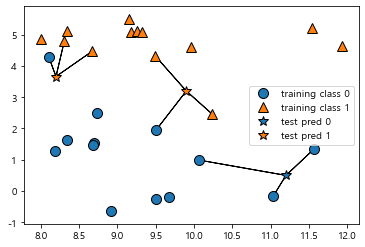

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # n_neighbors이웃의 개수
# 이웃의 갯수의 따라 결과가 달라 질 수 있다.
# 이웃의 갯수는 홀수개로 지정하는 것이 좋다. 별도의 성능낭비를 없앨 수 있다.

---
## L1 norm, L2 norm 
- L1 norm
    - 단순한 거리의 절대값의 합 
    - 맨하탄 거리 
    - ||x|| p = (시그마 i=1 부터 n 까지  xi의 절대값의 합  p)1/p  p(파라미터)의 1를 주면 L1 norm 
- L2 norm 
    - 거리의 절대값의 합에 루트 적용 
    - 피타고라스의 정리, 유클리드 거리
    - ||x|| p = (시그마 i=1 부터 n 까지  xi의 절대값의 합  p)1/p  p(파라미터)의 2를 주면 L2 norm 

In [58]:
# 데이터 포인트의 최단 거리 :  L2 norm으로 계산
df = pd.DataFrame(np.random.randint(low=1,high=10,size=(3,2)))
df.columns=["x", "y"]
df

,x,y
0,9,2
1,3,4
2,1,9


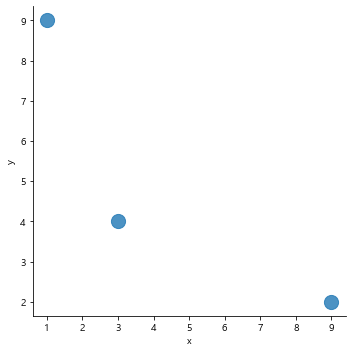

In [59]:
sns.lmplot('x', 'y',data=df, fit_reg=False, scatter_kws={"s" : 200})

In [5]:
from numpy import linalg

dt_point = df.values
dt_point

#(0,0)으로 부터 어디가 제일 가까울까?
linalg.norm(dt_point, ord=2, axis=1) # ord=1 이면 L1 norm / ord=2이면 L2 norm

NameError: name 'df' is not defined

In [65]:
# L1 norm 게산 (단순히 거리의 합계를 구할 때)
# 3명이 주사위를 3번 던진 후 걸음 수를 측정한다.
df = pd.DataFrame(np.random.randint(low=-3,high=3,size=(3,3)))
df.columns=["move_1","move_2","move_3"]
print(df)

#누가 가장 많이 걸었을까 ?
walk = df.values
linalg.norm(walk, ord=1, axis=1)

   move_1  move_2  move_3
0       2      -2      -1
1       1      -3      -3
2      -2       1      -3


array([5., 7., 6.])

### KNN 구현 

In [13]:
# 훈련용데이터와 샘플 데이터 나누기
X, y = mglearn.datasets.make_forge() 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19, 2) (7, 2) (19,) (7,)


C:\Users\Master\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) # 이웃의 갯수를 몇개로 거리계산을 한 것인지

clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [100]:
#?KNeighborsClassifier


In [77]:
#훈련받은 함수로 테스트
#clf.predict(X_train) 
#훈련받은 것으로 테스트를 하는 것은 쓸모가 없다.

#따로 뽑아 놓은 것으로 테스트
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [76]:
#y_train

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [78]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [79]:
clf.score(X_test, y_test ) #점수 

0.8571428571428571

---
### KNN 분석 

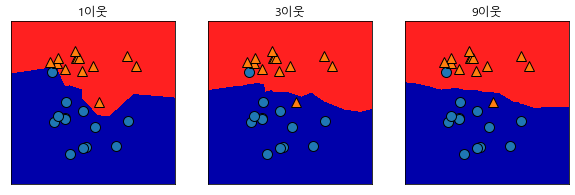

In [19]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neigh, ax in zip([1,3, 9], axes):
    #print(n_neigh)
    #print(ax)
    clf = KNeighborsClassifier(n_neighbors=n_neigh) .fit(X,y)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    #구분선
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax)
    
    ax.set_title("{}이웃".format(n_neigh))
# 1, 3, 9 는 이웃의 갯수를 정할수 있게 하기위해 준비
# 1 현재데이터에는 딱 맞지만 새로운 데이터가 들어오면 오류가 날 가능성이 크다. / 과대적합이 일어날 가능성이 크다 


In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape, X_test.shape)



(426, 30) (143, 30)


In [34]:
#clf = KNeighborsClassifier(n_neighbors=1) .fit(X_train,y_train)
clf = KNeighborsClassifier(n_neighbors=5) .fit(X_train,y_train)


In [35]:
clf.score(X_train, y_train)

0.9413145539906104

In [36]:
clf.score(X_test, y_test)  #이웃을 1로 했을때 훈련한데이터랑 테스트데이터의 결과가 차이가 나기 떄문에 과대적합

0.9370629370629371

In [51]:
train_acc=[] # 훈련한 결과의 정확도
test_acc=[] # 테스트나 결과의 정확도

for n_neigh in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=n_neigh) .fit(X_train,y_train)
    train_acc.append(clf.score(X_train,y_train))
    test_acc.append(clf.score(X_test, y_test))

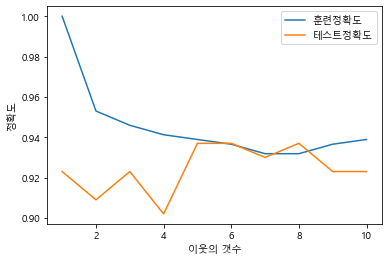

In [52]:
plt.plot(range(1, 11), train_acc, label="훈련정확도")
plt.plot(range(1, 11), test_acc, label="테스트정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 갯수")
plt.legend()

In [104]:
clf = KNeighborsClassifier(n_neighbors=5) .fit(X_train,y_train)

In [54]:
clf.score(X_train, y_train)

0.9389671361502347

In [55]:
clf.score(X_test, y_test)

0.9370629370629371

In [57]:
test_acc[6]

0.9300699300699301

### 회귀분석을 위한 KNN (다른 모든 분류알고리즘도 회귀용으로도 쓸 수 있다.)

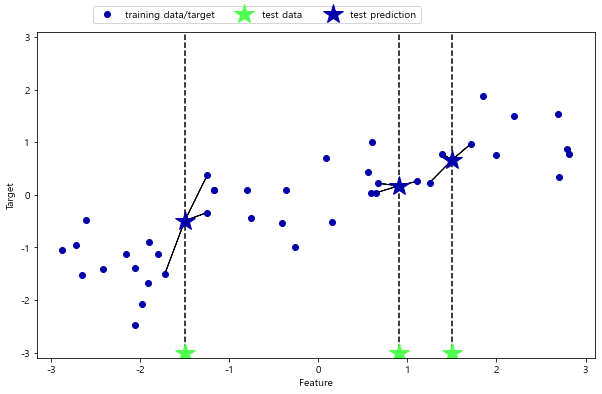

In [60]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
#tsetdata에서 가장가까운 이웃의 값으로 처리 
#2개 이상일 경우 가까운 이웃들의 평균값으로 철;

In [63]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25) #.25%가 기본값
print(X_train.shape, X_test.shape)

(30, 1) (10, 1)


In [ ]:
?train_test_split

In [8]:
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [65]:
print("설명 계수(R^2) :", reg.score(X_test, y_test)) #설명계수 : 상관계수의 제곱

설명 계수(R^2) : 0.8344172446249605


In [67]:
X_test


array([[-1.24713211],
       [ 0.67111737],
       [ 1.71105577],
       [-2.06388816],
       [-2.87649303],
       [-1.89957294],
       [ 0.55448741],
       [ 2.81945911],
       [-0.40832989],
       [-2.72129752]])

In [70]:
#reg.predict([[-1.24713211]])
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [71]:
y_test #회귀분석이기 때문에 비슷한 값을 찾아야 한다. -> 비슷한정도가 83%이다. 

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

In [78]:
reg=KNeighborsRegressor(n_neighbors=4)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [73]:
print("설명 계수(R^2) :", reg.score(X_test, y_test)) 
#이웃이 3개일때 설명계수가 가장 높기 떄문에 이웃을 3개로 설정하는 것이 적절하다.

설명 계수(R^2) : 0.3519867415115093


In [74]:
reg.predict(X_test)

array([-0.3409073 ,  0.03527881,  1.87664889, -2.47196233, -1.52730805,
       -1.67303415,  0.03497884,  0.86893293,  0.09398858, -1.52730805])

In [75]:
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

#### KNeighborsRegressor 분석

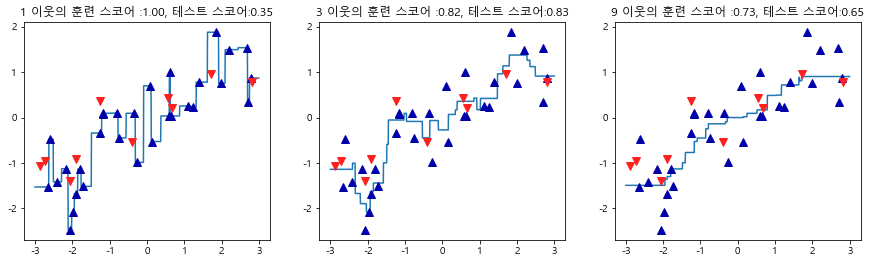

In [84]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,  3, 1000).reshape(-1, 1)

for n_neigh, ax in zip([1,3,9], axes):
    reg=KNeighborsRegressor(n_neighbors=n_neigh).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    # 이웃이 하나일때는 복잡도가 크지만 새로운데이터가 들어왔을때 유연성은 떨어진다. 
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    # 빨간색은 테스트용 데이터 
    ax.set_title("{0} 이웃의 훈련 스코어 :{1:.2f}, 테스트 스코어:{2:.2f}".format(n_neigh, reg.score(X_train, y_train), reg.score(X_test, y_test)))

# 

### iris를 이용한 사례

In [9]:
from sklearn.datasets import load_iris
iris= load_iris()
print(iris.keys())
print("---------------------------")
print(iris.target_names)
print("---------------------------")
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
---------------------------
['setosa' 'versicolor' 'virginica']
---------------------------
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [94]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F807A1FBE0>,
      dtype=object)

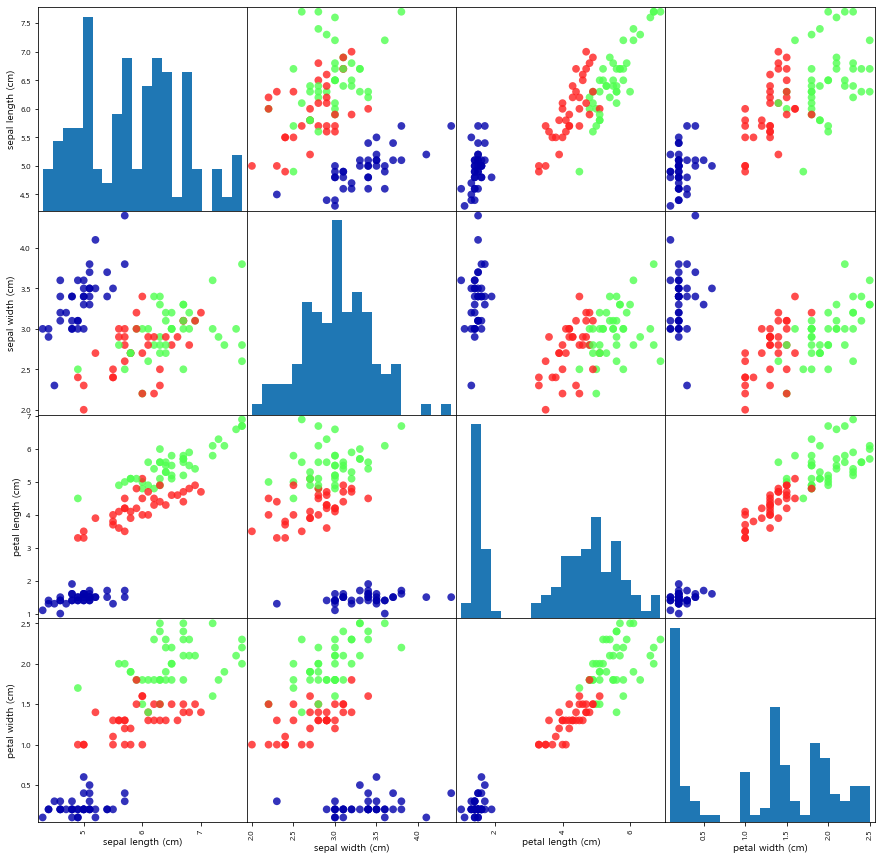

In [124]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df
pd.plotting.scatter_matrix(iris_df, figsize=(15,15), marker="o",s=60, cmap=mglearn.cm3, c=y_train, alpha=.8,
                          hist_kwds={"bins":20})
# 좀더 두드러진 차이가 나는 것으로 비교하는것이 학습효과가 좋다 .

In [129]:
#knn=KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [132]:
knn.score(X_test, y_test)

# score함수
pred= knn.predict(X_test)
print(np.mean(pred== y_test))

1.0


In [134]:
#꽃받침(Sepal)의 길이가 5cm, 폭은 2,9cm, 꽃잎(Petal)의 길이 1cm, 폭은 0.2cm의 품종은 무엇일까
s_length = 5.0
s_width=2.9
p_length =1.0
p_width=0.2

X_new=np.array([[s_length, s_width, p_length, p_width]])
pred = knn.predict(X_new)




print("붓꽃의 품종은?", iris.target_names[pred])

붓꽃의 품종은? ['setosa']


### 영화 분류 프로그램 만들기

In [10]:
# KNN 알고리즘 직접 만들어 보기 

import operator

def createDataSet():
    group = np.array([[1.0, 2.0],[1.0, 4.0],[4.0, 1.0],[4.0, 2.0]]) # x축은 키스횟수, y축은 발차기 회수
    label=["Action","Action","Romance","Romance"]
    return group, label
#거리계산 함수 
def calcDistance(X_new, data):
    # 데이터의 갯수
    dataSize = len(data)
    #print(data.shape[0])
    
    # 입력 데이터와 기존 데이터의 차이 
    diffMat = np.tile(X_new, (dataSize, 1))-data
    
    # L2 norm
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance**0.5
    
    return distance.argsort() #정렬
    
def findMajorityClass(target, k, sortedDistance):
    classCount = {}
    
    for i in range(k): #이웃수만큼 반복
        voteLabel = target[sortedDistance[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
        
    return sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
        
        
def classify(X_new, data, target, k ):
    sortedDistance = calcDistance(X_new, data)
    sortedDistanceCount = findMajorityClass(target, k, sortedDistance)
    
    return sortedDistanceCount

In [11]:
X, y= createDataSet()
result=classify([2.0, 3.0], X, y, 3)
print("결과는 {}영화다".format(result[0][0]))

결과는 Action영화다


In [12]:
np.tile([2.0,3.0], (4,1)) # np.tile 똑같은 데이터를 한 번에 여러개 만들어 줌

# tile 
A = 1 
B = np.array([0,1])
C = np.array([[0,1],[2,3]])

np.tile(A, 3)
np.tile(B, 3)
np.tile(C, 3)

np.tile(A, (2,3))
np.tile(B, (2,3))
np.tile(C, (2,3))

array([[0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3],
       [0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3]])